In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\RD Engineering\Oasis Infobyte\Iris Flower Classification\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Data Cleaning

In [17]:
df.rename(columns = {'SepalLengthCm':'sepal_length','SepalWidthCm':'sepal_width','PetalLengthCm':'petal_length','PetalWidthCm':'petal_width'},inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.shape

(150, 5)

In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [22]:
df.duplicated().sum()

3

In [23]:
df = df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

In [25]:
df.shape

(147, 5)

In [44]:
df['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [26]:
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis

<Axes: >

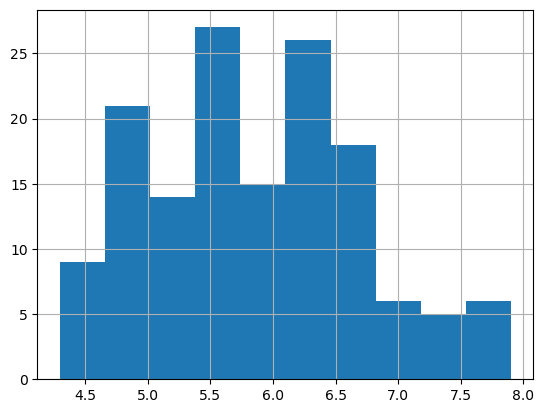

In [27]:
df['sepal_length'].hist()

<Axes: >

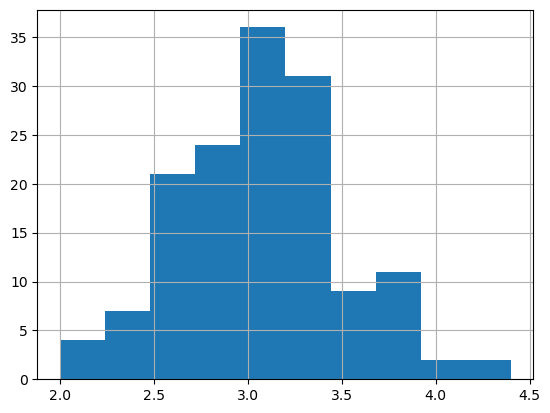

In [28]:
df['sepal_width'].hist()

<Axes: >

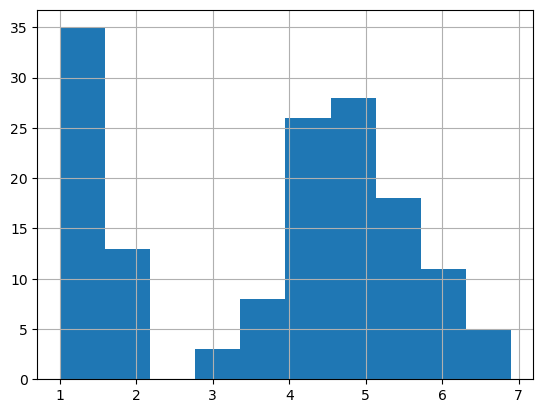

In [29]:
df['petal_length'].hist()

<Axes: >

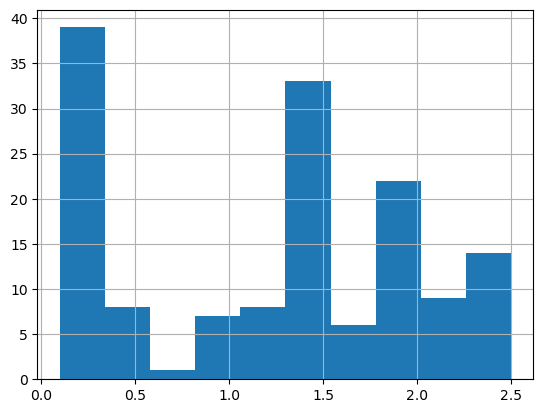

In [30]:
df['petal_width'].hist()

In [33]:
colors = ['red','blue','yellow']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

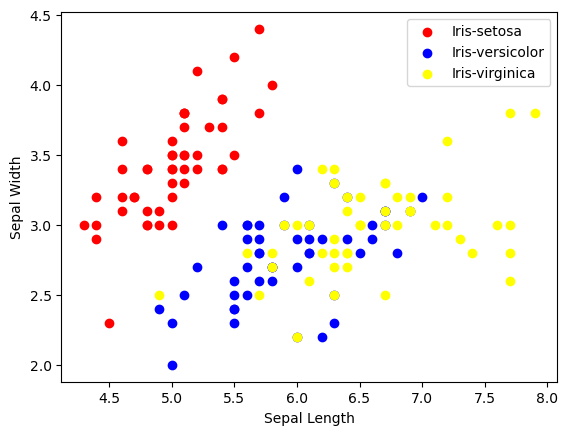

In [36]:
#Sepal length vs width
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

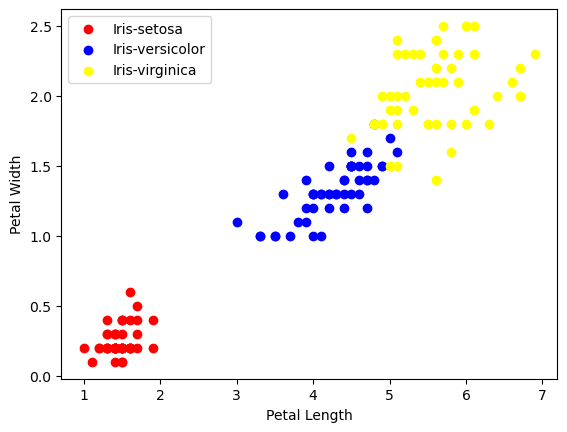

In [37]:
#Petal length vs width
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

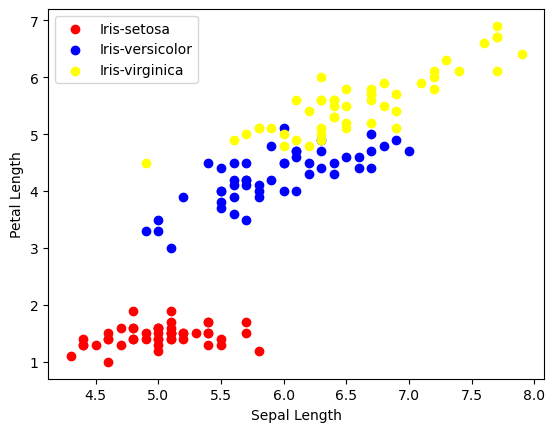

In [38]:
#Sepal vs Petal length
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

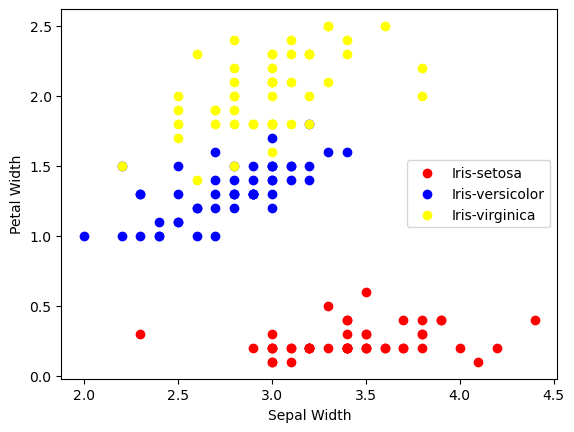

In [39]:
#Sepal vs petal width
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


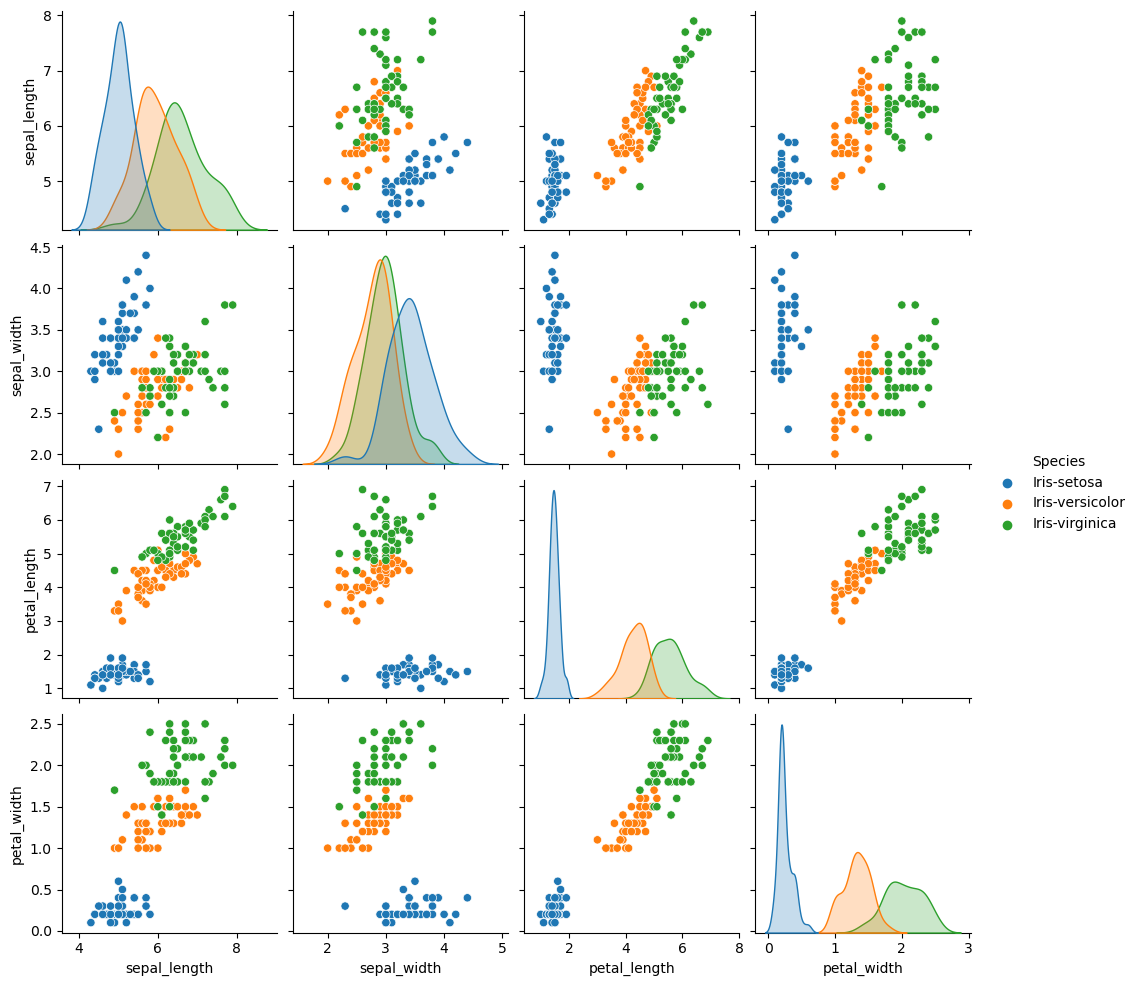

In [40]:
sns.pairplot(df, hue='Species')
plt.show()

In [159]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, mean_accuracy_score, mean_squared_error, r2_score

ImportError: cannot import name 'mean_accuracy_score' from 'sklearn.metrics' (C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

<Axes: >

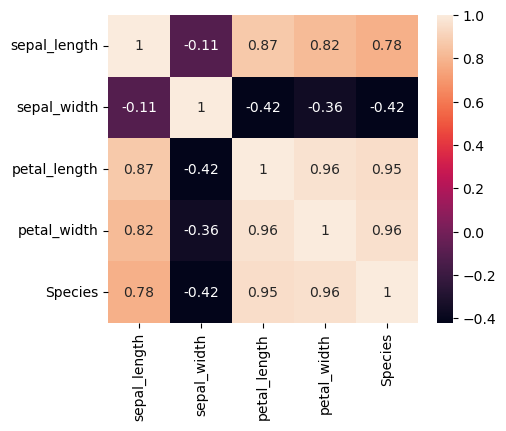

In [49]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [50]:
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [148]:
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [149]:
model = LogisticRegression()

In [150]:
model.fit(x_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [158]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


In [152]:
model = KNeighborsClassifier()

In [153]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [154]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0


In [155]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [156]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [157]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  100.0
